#### dev egg ideas

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from clean_questions import *
from subject_select import *

In [29]:
def select_digestive_reverse(save=True):
    """select digestive prediction set"""
    # load controls
#     df_controls = pd.read_csv('./data/qsidp_patients.csv')
    df_controls = pd.read_csv('./data/qsidp_pain_plus.csv')
    print(df_controls.shape)
    # extract dates
    qs = load_qscode(questionnaire=['digestive', 'demographic'], idp=None)
    df_qs = extract_qs(df_controls, df_questionnaire=qs, visits=[2])
    # rename dates
    df_qs.rename(columns={'53-2.0':'imaging_date', '21023-0.0':'digest_date'}, inplace=True)
    # slice out digestive after imaging
    df_dt = pd.to_datetime(df_qs['digest_date'])
    df_it = pd.to_datetime(df_qs['imaging_date'])
    # calcualte diff
    diff = (df_dt-df_it).values
    dff = diff.astype('int64')
    # those finished digestive after imaging
    df_dig = df_qs[dff>0]
    # output
    df_out = df_controls[df_controls['eid'].isin(df_dig['eid'])]
    # save
#     if save:
#         df_out.to_csv('./data/qsidp_digestive.csv', index=None)
    return df_out

In [63]:
df = select_digestive_reverse()
df = df.drop_duplicates(subset='eid')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3357: DtypeWarning: Columns (863,865,867,869) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


(18697, 2861)


In [64]:
df.shape

(3863, 2861)

In [32]:
digestive_codes = pd.read_csv('./bbk_codes/digestive_code.csv')

In [33]:
digestive_codes

,Field title,code
0,When digestive heakth questionnaire completed,21023
1,Abdominal discomfort/pain for 6 months or longer,21027
2,Currently (in last 3 months) suffer from abdom...,21035
3,Degree bothered by back pain in the past 3 months,21048
4,Degree bothered by chest pain in the last 3 mo...,21052
5,Degree bothered by headaches in the last 3 months,21051
6,Degree bothered by pain in arms/legs/joints in...,21049
7,Degree bothered by pain/problems during interc...,21057
8,Frequency of discomfort/pain in abdomen in las...,21025
9,Severity of current abdominal pain,21036


In [65]:
# pain_codes = [21048, 21052, 21051, 21049, 21057]
pain_codes = [21048]

In [66]:
pc = [str(p)+'-0.0' for p in pain_codes]

In [67]:
# pc_new = pc+['21027-0.1']
pc_new = pc

In [68]:
for p in pain_codes:
    dfp = check_field(df, p, visit=0)
    print(dfp)

['21048-0.0']


In [129]:
# construct abdominal pain degree bothered by
con = []
for f in df['21027-0.0']:
    if f==0.:
        con.append(-600.)
    else:
        con.append(-601.)
df.loc[:,'21027-0.1'] = con

In [130]:
for p in pc_new:
    print(p, df[p].value_counts())

21048-0.0 -601.0    2579
-600.0    1378
-602.0    1089
Name: 21048-0.0, dtype: int64


In [69]:
dfok = check_count(df, pc_new, -600)

In [70]:
dfok.shape

(980, 2861)

In [71]:
dfok.drop_duplicates(subset='eid').shape

(980, 2861)

In [72]:
dfok2 = dfok.drop_duplicates(subset=['eid'])

In [73]:
pc_new = pc_new+['eid']

In [74]:
dftmp = dfok2[pc_new]
df_tmp = dftmp.set_index('eid')

In [75]:
df_tmp.shape

(980, 1)

In [76]:
# go back to check back pain
dfb = df[['3571-2.0','eid']]

In [77]:
dfb_id = dfb[dfb['3571-2.0']==1.].drop_duplicates(subset='eid')

In [78]:
dfb_id.shape

(1338, 2)

In [79]:
gotbetter = dfb_id[dfb_id['eid'].isin(dftmp['eid'])]

In [80]:
len(gotbetter)

74

### looking at people whose back pain got better

In [81]:
dfbp = df[df['eid'].isin(dfb_id['eid'])]

In [82]:
dfbp.shape

(1338, 2861)

In [83]:
dfbp['21048-0.0'].value_counts()

-601.0    649
-602.0    615
-600.0     74
Name: 21048-0.0, dtype: int64

In [84]:
recovery = dfbp['21048-0.0'].values==-600

In [85]:
dfbp.loc[:,'bp_recovery'] = recovery

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/pandas/core/indexing.py:1743: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [86]:
dfbp.shape

(1338, 2862)

In [87]:
dfbp.to_csv('./data/qsidp_bprecovery.csv', index=None)

#### check basics

In [183]:
dfbp = pd.read_csv('./data/qsidp_bprecovery.csv')
# dfbp = pd.read_csv('./data/qsidp_bprecovery_bponly.csv')

/home/fs0/syzhang/.conda/envs/bbk/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (863,867) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [184]:
dfbp.shape

(1338, 2862)

In [185]:
dfbp = dfbp.drop_duplicates(subset='eid')

In [186]:
dfbp.shape

(1338, 2862)

In [187]:
29/455

0.06373626373626373

In [188]:
dfbp['bp_recovery'].value_counts()

False    1264
True       74
Name: bp_recovery, dtype: int64

In [16]:
c = 25751
dff = pd.DataFrame({'eid': dfbp['eid'].values, '1': f'{c}_2_0'})
print(dff.head())

dff.to_csv(f'../ukbf/bponly_{c}.csv',index=None,header=None,sep=' ')

       eid          1
0  1011648  25751_2_0
1  1023942  25751_2_0
2  1025998  25751_2_0
3  1032549  25751_2_0
4  1034464  25751_2_0


##### pick out back pain only

In [92]:
# restrict to those with one of the 3+ month cwp
fields = pd.read_csv('./bbk_codes/cwp_code.csv')
ff = fields[fields['code']!=6159]['code'].to_list()
fn = fields[fields['code']!=6159]['Field title'].to_list()

In [93]:
fls = []
for f in ff:
    fls += check_field(dfbp, f)

In [94]:
fls

['3799-2.0',
 '4067-2.0',
 '3404-2.0',
 '3571-2.0',
 '3741-2.0',
 '3414-2.0',
 '3773-2.0',
 '2956-2.0']

In [95]:
bponly = []
for i, r in dfbp.iterrows():
    if np.nansum(r[fls])==1 and r['3571-2.0']==1.:
        bponly.append(r['eid'])

In [96]:
len(bponly)

484

In [97]:
dfbq_only = dfbp[dfbp['eid'].isin(bponly)]

In [98]:
dfbq_only.shape

(484, 2862)

In [99]:
dfbq_only['bp_recovery'].value_counts()

False    455
True      29
Name: bp_recovery, dtype: int64

In [101]:
dfbq_only.to_csv('./data/qsidp_bprecovery_bponly.csv', index=None)

##### chekc disease

In [102]:
dfbp_rec = dfbp[dfbp['bp_recovery']==1]

In [103]:
dfbp_disease = disease_label(dfbp_rec, visits=[2], grouping='detailed')

<AxesSubplot:>

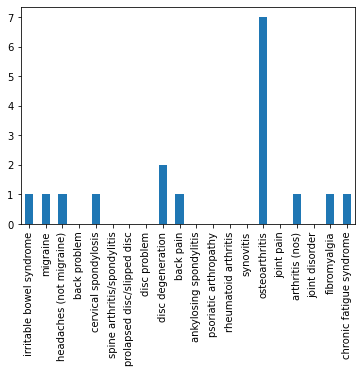

In [104]:
dfbp_disease.sum().plot(kind='bar')

##### make age/sex matched

In [109]:
from compare_control import extract_control

In [110]:
recov = dfbp[dfbp['bp_recovery']==1]
contr = dfbp[dfbp['bp_recovery']==0]

In [111]:
matched = extract_control(contr, recov, save_csv=False)

In [112]:
len(matched)

28

In [113]:
dfbp_matched = dfbp[dfbp['eid'].isin(matched)].drop_duplicates(subset='eid')

In [114]:
dfbp_matched.shape

(28, 2862)

In [115]:
dfbp = pd.concat([recov, dfbp_matched])

In [116]:
dfbp.shape

(57, 2862)

##### basic classification

In [138]:
# prep data for classification
questionnaire = 'all'
idp = None
question_visits = [2]
# load question code
qs = load_qscode(questionnaire=questionnaire, idp=idp)
# extract questionnaire of interest
df_qs = extract_qs(dfbp, df_questionnaire=qs, visits=question_visits)
# put in labels
df_qs['label'] = dfbp['bp_recovery']
# impute
dff_imputed = impute_qs(df_qs, freq_fill='median', nan_percent=0.9, transform=False)

Classification report for classifier RandomForestClassifier(max_depth=5):
              precision    recall  f1-score   support

       False       0.40      0.43      0.41        14
        True       0.38      0.36      0.37        14

    accuracy                           0.39        28
   macro avg       0.39      0.39      0.39        28
weighted avg       0.39      0.39      0.39        28

ROC AUC=0.3214, train accuracy=1.0000, test accuracy=0.3929


(0.32142857142857145, 1.0, 0.39285714285714285)

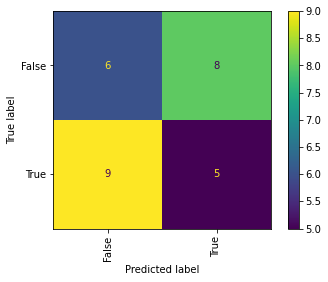

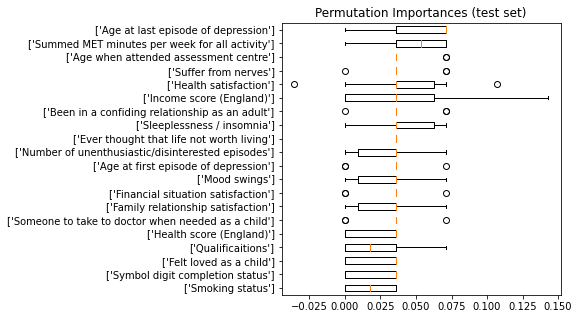

In [139]:
# run basic classification
basic_classify(dff_imputed, classifier='rforest', random_state=1, test_size=0.5, 
               save_plot=True, num_importance=20, questionnaire=questionnaire, idp=idp, 
               save_name='backpain_recovery', scaler=True, balance=True)

In [140]:
cv_classify(dff_imputed, classifier='rforest', cv_fold=4, scaler=True, balance=True)

2
4-fold CV classification with classifier RandomForestClassifier(max_depth=5):
test ROC AUC=0.2551, test accuracy=0.3571, test f1=0.4225


,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
0,0.156252,0.028176,0.428571,0.428571,0.285714
1,0.150489,0.027445,0.500000,0.533333,0.408163
2,0.148528,0.027035,0.285714,0.375000,0.244898
3,0.153358,0.028692,0.214286,0.352941,0.081633


In [141]:
cv_classify(dff_imputed, classifier='lgb', cv_fold=4, scaler=True, balance=True)

2
4-fold CV classification with classifier LGBMClassifier():
test ROC AUC=0.4464, test accuracy=0.5179, test f1=0.4122


,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
0,0.015927,0.003951,0.428571,0.333333,0.265306
1,0.013115,0.003683,0.642857,0.615385,0.591837
2,0.013039,0.003832,0.571429,0.500000,0.581633
3,0.012829,0.003656,0.428571,0.200000,0.346939


In [118]:
# prep data for classification
questionnaire = None
idp = 'all'
question_visits = [2]
# load question code
qs = load_qscode(questionnaire=questionnaire, idp=idp)
# extract questionnaire of interest
df_qs = extract_qs(dfbp, df_questionnaire=qs, visits=question_visits)
# put in labels
df_qs['label'] = dfbp['bp_recovery']
# impute
dff_imputed = impute_qs(df_qs, freq_fill='median', nan_percent=0.9, transform=False)

Classification report for classifier RandomForestClassifier(max_depth=5):
              precision    recall  f1-score   support

       False       0.61      0.38      0.47        37
        True       0.55      0.76      0.64        37

    accuracy                           0.57        74
   macro avg       0.58      0.57      0.55        74
weighted avg       0.58      0.57      0.55        74

ROC AUC=0.4719, train accuracy=1.0000, test accuracy=0.5676


(0.47187728268809354, 1.0, 0.5675675675675675)

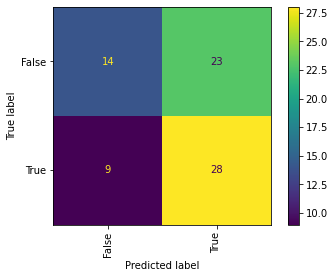

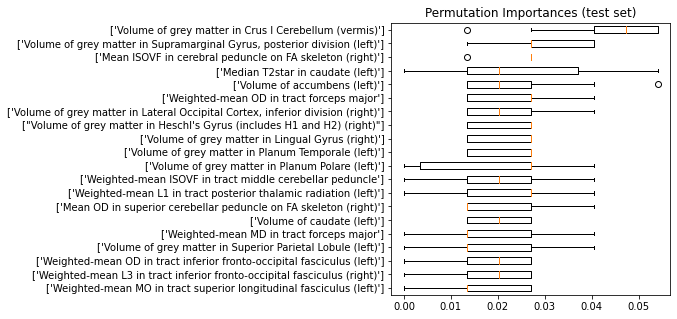

In [119]:
# run basic classification
basic_classify(dff_imputed, classifier='rforest', random_state=1, test_size=0.5, 
               save_plot=True, num_importance=20, questionnaire=questionnaire, idp=idp, 
               save_name='backpain_recovery', scaler=True, balance=True)

In [120]:
# prep data for classification
questionnaire = 'all'
idp = 'all'
question_visits = [2]
# load question code
qs = load_qscode(questionnaire=questionnaire, idp=idp)
# extract questionnaire of interest
df_qs = extract_qs(dfbp, df_questionnaire=qs, visits=question_visits)
# put in labels
df_qs['label'] = dfbp['bp_recovery']
# impute
dff_imputed = impute_qs(df_qs, freq_fill='median', nan_percent=0.9, transform=False)

Classification report for classifier RandomForestClassifier(max_depth=5):
              precision    recall  f1-score   support

       False       0.52      0.43      0.47        37
        True       0.51      0.59      0.55        37

    accuracy                           0.51        74
   macro avg       0.51      0.51      0.51        74
weighted avg       0.51      0.51      0.51        74

ROC AUC=0.5310, train accuracy=1.0000, test accuracy=0.5135


(0.5310445580715851, 1.0, 0.5135135135135135)

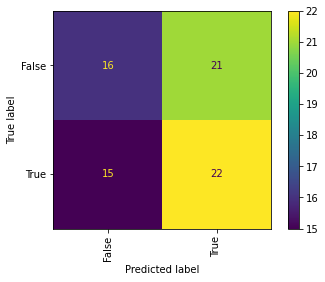

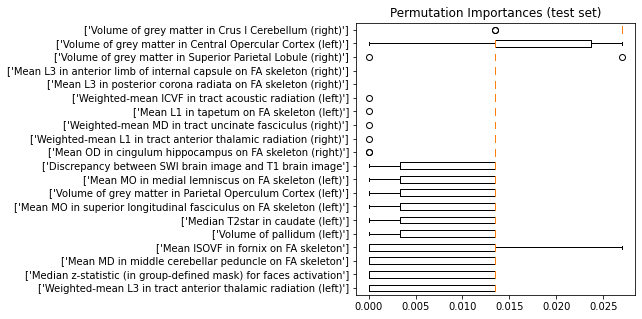

In [121]:
# run basic classification
basic_classify(dff_imputed, classifier='rforest', random_state=1, test_size=0.5, 
               save_plot=True, num_importance=20, questionnaire=questionnaire, idp=idp, 
               save_name='backpain_recovery', scaler=True, balance=True)

In [122]:
cv_classify(dff_imputed, classifier='lgb', cv_fold=4, scaler=True, balance=True)

2
4-fold CV classification with classifier LGBMClassifier():
test ROC AUC=0.5263, test accuracy=0.5068, test f1=0.4833


,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
0,0.355282,0.007838,0.513514,0.437500,0.602339
1,0.323698,0.005524,0.702703,0.685714,0.675439
2,0.343363,0.006289,0.405405,0.388889,0.447368
3,0.324073,0.005441,0.405405,0.421053,0.380117


In [189]:
# prep data for classification
questionnaire = 'all' #'all'
idp = 'all' #'all'
question_visits = [2]
# load question code
qs = load_qscode(questionnaire=questionnaire, idp=idp)
# extract questionnaire of interest
df_qs = extract_qs(dfbp, df_questionnaire=qs, visits=question_visits)
# put in labels
df_qs['label'] = dfbp['bp_recovery']
# impute
dff_imputed = impute_qs(df_qs, freq_fill='median', nan_percent=0.9, transform=False)

In [190]:
dff_imputed.shape

(1338, 982)

In [191]:
dff_imputed['label'].value_counts()

False    1264
True       74
Name: label, dtype: int64

In [192]:
from connectivity_mat import load_connectivity

In [193]:
dff_conn = load_connectivity(task_name=None, dff=dff_imputed, 
                  conn_type='fullcorr_100',add_questionnaire=False, add_idp=False, 
                  add_conn=True, patient_grouping='simplified')

In [194]:
dff_conn.shape

(720, 1487)

In [195]:
dff_conn['label'].value_counts()

False    688
True      32
Name: label, dtype: int64

In [198]:
cv_classify(dff_conn, classifier='rforest', cv_fold=2, scaler=True, balance=True)

2
2-fold CV classification with classifier RandomForestClassifier(max_depth=5):
test ROC AUC=0.5137, test accuracy=0.4844, test f1=0.4499


,fit_time,score_time,test_accuracy,test_f1,test_roc_auc
0,0.165314,0.031156,0.46875,0.370370,0.464844
1,0.165569,0.029088,0.50000,0.529412,0.562500
